Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.:** | **Final Examination**
**Names:** | Garcia, Christian Andrei V.
**Section:** | CPE32S1
**Date Performed**: | 5/14/24
**Date Submitted**: | 5/19/24
**Instructor**: | Engr. Ryan Francisco

<hr>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install tensorflow keras scikit-learn

In [3]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib
import glob
import matplotlib.pyplot as plt
import seaborn as sns

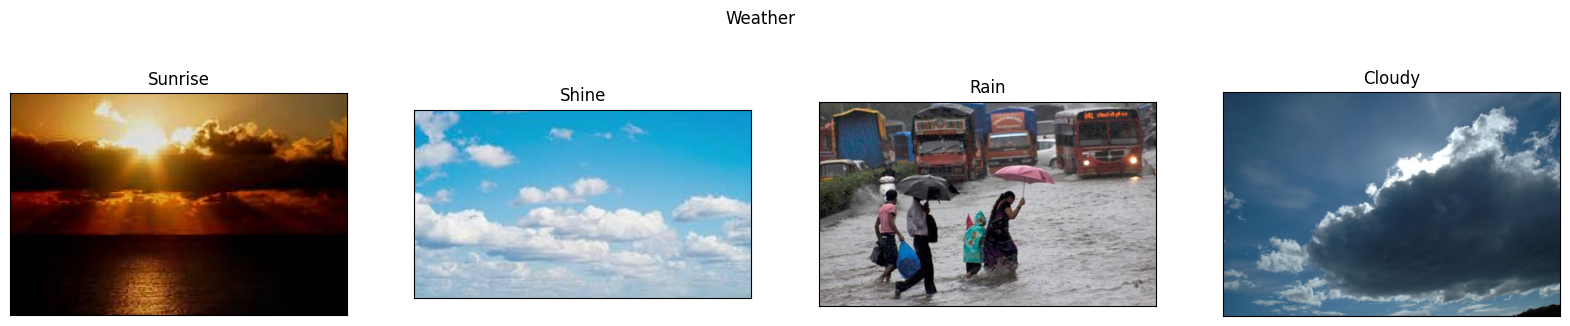


Found [1125] images belonging to 4 classes.

Sunrise class contains 357 images.
Shine class contains 253 images.
Rain class contains 215 images.
Cloudy class contains 300 images.


In [4]:
data_dir = "/content/drive/MyDrive/Dataset/Multi-class Weather Dataset"

Sunrise = glob.glob(data_dir + '/Sunrise/*')[:357]
Shine = glob.glob(data_dir + '/Shine/*')[:253]
Rain = glob.glob(data_dir + '/Rain/*')[:215]
Cloudy = glob.glob(data_dir + '/Cloudy/*')[:300]

allImages = [len(Sunrise) + len(Shine) + len(Rain) + len(Cloudy)]
fig, ax = plt.subplots(ncols = 4, figsize = (20, 4))
fig.suptitle('Weather')
plt.setp(ax, xticks=[], yticks=[])

Sunrise_image = img.imread(Sunrise[0])
Shine_image = img.imread(Shine[0])
Rain_image = img.imread(Rain[0])
Cloudy_image = img.imread(Cloudy[0])

ax[0].set_title('Sunrise')
ax[1].set_title('Shine')
ax[2].set_title('Rain')
ax[3].set_title('Cloudy')

ax[0].imshow(Sunrise_image)
ax[1].imshow(Shine_image)
ax[2].imshow(Rain_image)
ax[3].imshow(Cloudy_image)

plt.show()
print(f"\nFound {allImages} images belonging to 4 classes.\n")
print(f"Sunrise class contains {len(Sunrise)} images.")
print(f"Shine class contains {len(Shine)} images.")
print(f"Rain class contains {len(Rain)} images.")
print(f"Cloudy class contains {len(Cloudy)} images.")

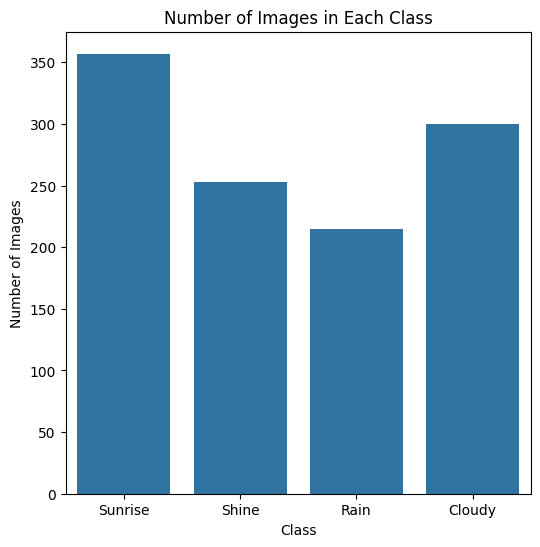

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

classes = ['Sunrise', 'Shine', 'Rain', 'Cloudy']
allImages1 = [len(Sunrise), len(Shine), len(Rain), len(Cloudy)]

plt.figure(figsize=(6, 6))
sns.barplot(x = classes, y = allImages1)
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

data_dir = "/content/drive/MyDrive/Dataset/Multi-class Weather Dataset"
img_height, img_width = 244, 244
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [7]:
model = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 178608)            0         
                                                                 
 dense (Dense)               (None, 512)               91447808  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 91612548 (349.47 MB)
Trainable params: 91612548 (349.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    validation_data = valid_gen,
    validation_steps = valid_gen.samples // batch_size,
    epochs = 50
)

Epoch 1/50
28/28 [==============================] - 228s 8s/step - loss: 36.2273 - accuracy: 0.4649 - val_loss: 11.2370 - val_accuracy: 0.6161
Epoch 2/50
28/28 [==============================] - 70s 2s/step - loss: 5.9126 - accuracy: 0.6720 - val_loss: 4.0375 - val_accuracy: 0.7634
Epoch 3/50
28/28 [==============================] - 62s 2s/step - loss: 3.9105 - accuracy: 0.7123 - val_loss: 7.8742 - val_accuracy: 0.5714
Epoch 4/50
28/28 [==============================] - 66s 2s/step - loss: 3.7844 - accuracy: 0.7123 - val_loss: 4.2296 - val_accuracy: 0.6429
Epoch 5/50
28/28 [==============================] - 66s 2s/step - loss: 2.6511 - accuracy: 0.7342 - val_loss: 2.3871 - val_accuracy: 0.7723
Epoch 6/50
28/28 [==============================] - 82s 3s/step - loss: 1.4761 - accuracy: 0.7814 - val_loss: 4.9575 - val_accuracy: 0.6071
Epoch 7/50
28/28 [==============================] - 65s 2s/step - loss: 1.3261 - accuracy: 0.8044 - val_loss: 1.5800 - val_accuracy: 0.6786
Epoch 8/50
28/28 

In [9]:
loss, accuracy = model.evaluate(valid_gen)
print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy:.2f}')

7/7 [==============================] - 4s 518ms/step - loss: 0.7596 - accuracy: 0.7991
Loss: 0.76
Accuracy: 0.80


In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

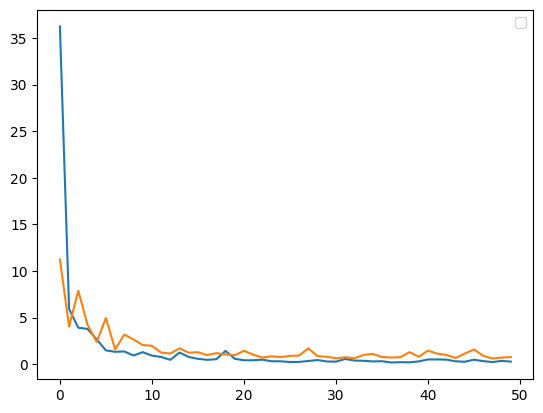

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

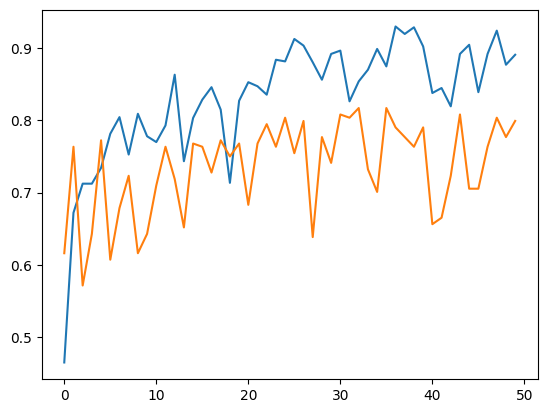

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

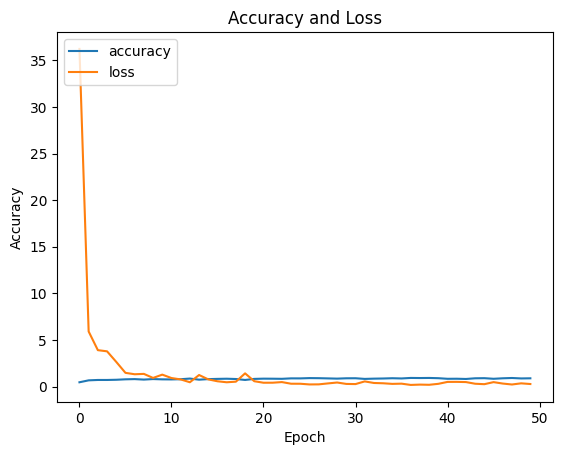

In [13]:
import matplotlib.pyplot as plt

def plot_history(model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.show()

plot_history(model)

# Save the best model

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

model_weather = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_weather)

model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_weather.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
pip install h5py

In [ ]:
from tensorflow.keras.models import load_model

model.save("/content/drive/MyDrive/Colab Notebooks/model_weather.hdf5")

# Test a sample image using the saved best model

1/1 [==============================] - 0s 62ms/step
Predicted label: Cloudy


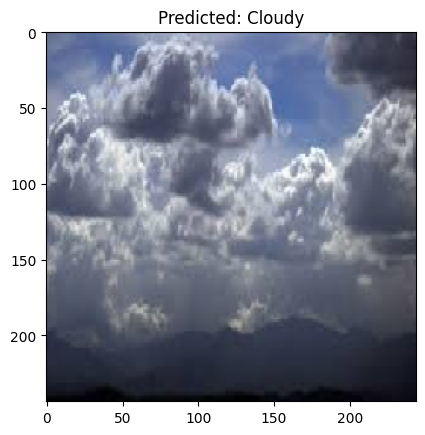

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def img_process(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = '/content/drive/MyDrive/Dataset/sample_data/cloudy165.jpg'
img_array = img_process(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted label: {predicted_label}')

plt.imshow(image.load_img(img_path, target_size=(img_height, img_width)))
plt.title(f'Predicted: {predicted_label}')
plt.show()


1/1 [==============================] - 0s 58ms/step
Predicted label: Rain


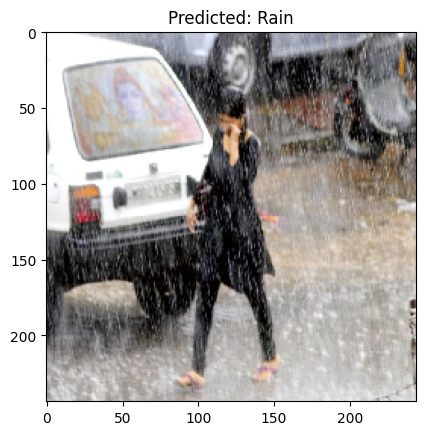

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def img_process(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = '/content/drive/MyDrive/Dataset/Multi-class Weather Dataset/Rain/rain104.jpg'
img_array = img_process(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted label: {predicted_label}')

plt.imshow(image.load_img(img_path, target_size=(img_height, img_width)))
plt.title(f'Predicted: {predicted_label}')
plt.show()

1/1 [==============================] - 0s 210ms/step
Predicted label: Shine


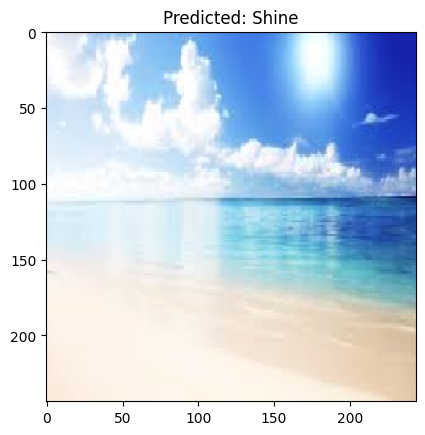

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


def img_process(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = '/content/drive/MyDrive/Dataset/Multi-class Weather Dataset/Shine/shine104.jpg'
img_array = img_process(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted label: {predicted_label}')

plt.imshow(image.load_img(img_path, target_size=(img_height, img_width)))
plt.title(f'Predicted: {predicted_label}')
plt.show()

1/1 [==============================] - 0s 59ms/step
Predicted label: Sunrise


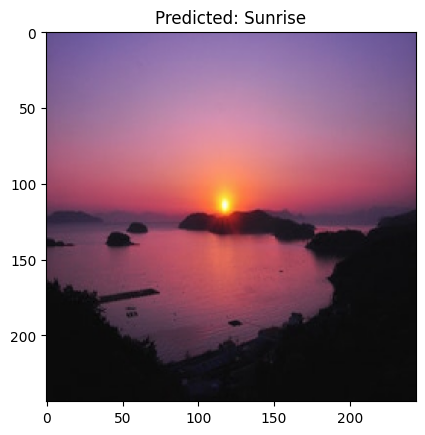

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


def img_process(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = '/content/drive/MyDrive/Dataset/Multi-class Weather Dataset/Sunrise/sunrise104.jpg'
img_array = img_process(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted label: {predicted_label}')

plt.imshow(image.load_img(img_path, target_size=(img_height, img_width)))
plt.title(f'Predicted: {predicted_label}')
plt.show()